In [1]:
import tensorflow as tf 
import numpy as np
import os
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.preprocessing.image import img_to_array, load_img
#import tensorflow_datasets as tfds
from tensorflow.keras.optimizers import Adam, RMSprop, Adamax
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
os.getcwd()

'd:\\Training\\C-DAC Sessions\\DBDA-Dec-25\\TensorFlow'

In [2]:
dir_path = "D:/Training/C-DAC Sessions/DBDA-Dec-25/SheepFaceImages"

In [5]:
datagen = ImageDataGenerator( rescale = 1.0/255., validation_split=0.15 )

train_generator = datagen.flow_from_directory( dir_path ,target_size = (150,150),seed=25,
               shuffle=True, batch_size = 32, class_mode = 'categorical', subset='training' )
validation_generator = datagen.flow_from_directory( dir_path, target_size = (150,150),seed=25,
               shuffle=False, batch_size = 32, class_mode = 'categorical', subset='validation' )

Found 1428 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


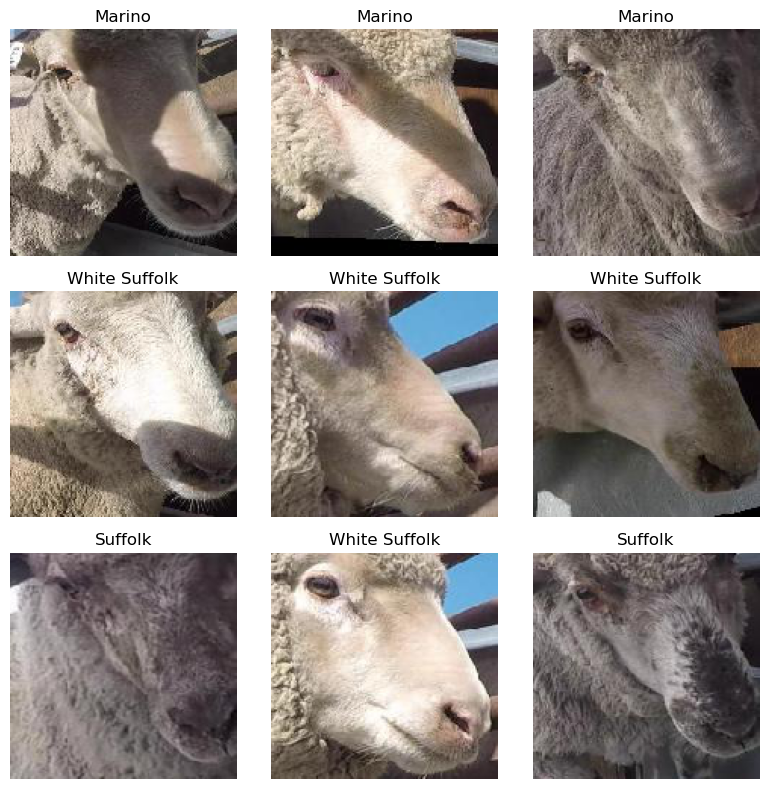

In [6]:
# show a few images from train_generator
batch = next(train_generator)  # (images, labels)
images, labels = batch[0], batch[1]
idx_to_class = {v: k for k, v in train_generator.class_indices.items()}

n = 9
n = min(n, images.shape[0])
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(8, 8))
for i in range(n):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i])
    lbl = labels[i]
    # handle scalar or one-hot label
    if hasattr(lbl, "__len__") and len(lbl) > 1:
        lbl = np.argmax(lbl)
    plt.title(idx_to_class.get(int(lbl), str(lbl)))
    plt.axis("off")
plt.tight_layout()
plt.show()

In [8]:
tf.random.set_seed(25)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(150,150,3)),   
    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),   
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),   
    tf.keras.layers.Dense(4, activation='softmax')
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 36, 36, 32)       128       
 hNormalization)                                                 
                                                      

In [9]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=2,restore_best_weights=True)
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy',  metrics = ['acc'])
history = model.fit(train_generator,  validation_data=validation_generator, epochs=100,
                              verbose=2, callbacks=[monitor])

c:\Users\hp\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
45/45 - 17s - loss: 1.0795 - acc: 0.6800 - val_loss: 1.5142 - val_acc: 0.4127 - 17s/epoch - 375ms/step
Epoch 2/100
45/45 - 15s - loss: 0.2476 - acc: 0.9097 - val_loss: 1.3116 - val_acc: 0.3651 - 15s/epoch - 332ms/step
Epoch 3/100
45/45 - 15s - loss: 0.0739 - acc: 0.9748 - val_loss: 1.4940 - val_acc: 0.3929 - 15s/epoch - 335ms/step
Epoch 4/100
45/45 - 14s - loss: 0.0740 - acc: 0.9755 - val_loss: 1.9264 - val_acc: 0.2579 - 14s/epoch - 319ms/step
Epoch 5/100
45/45 - 15s - loss: 0.0528 - acc: 0.9846 - val_loss: 0.8584 - val_acc: 0.6548 - 15s/epoch - 324ms/step
Epoch 6/100
45/45 - 15s - loss: 0.0908 - acc: 0.9727 - val_loss: 2.4720 - val_acc: 0.4524 - 15s/epoch - 324ms/step
Epoch 7/100
45/45 - 15s - loss: 0.0704 - acc: 0.9755 - val_loss: 1.1335 - val_acc: 0.5714 - 15s/epoch - 327ms/step
Epoch 8/100
45/45 - 14s - loss: 0.0565 - acc: 0.9839 - val_loss: 1.4220 - val_acc: 0.5198 - 14s/epoch - 320ms/step
Epoch 9/100
45/45 - 14s - loss: 0.0115 - acc: 0.9958 - val_loss: 1.4479 - val_ac

In [10]:
logloss, acc = model.evaluate(validation_generator)
print(f"Validation Log Loss: {logloss}, Validation Accuracy: {acc}")

8/8 [==============================] - 1s 81ms/step - loss: 0.4195 - acc: 0.8730
Validation Log Loss: 0.4195319414138794, Validation Accuracy: 0.8730158805847168
